Model Notebook

In [1]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input,Activation,Add 
from tensorflow.keras.regularizers import l2 
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop 



Extract data from Dataset

In [2]:
fldr = "./UTKFace"

In [3]:
import os
flies = os.listdir(fldr)

Create List of Age and Gender from the dataset

In [4]:
ages=[]
genders=[]
images=[]

for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr +'/'+fle
    print(total)
    image=cv2.imread(total)

    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)
   

./UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTKFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTKFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTKFace/10_0_0_2017

In [5]:
for fle in flies:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)


Viewing a Sample

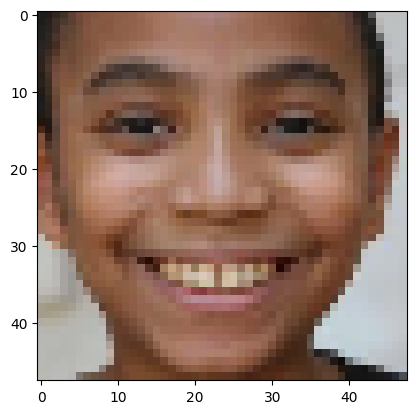

In [6]:
plt.imshow(images[87])

In [7]:
print(ages[87])

10


In [8]:
print(genders[87])

0


Saving images array,ages array, gender array in the system

In [9]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [10]:
np.save(fldr+'image.npy' , images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

Finding the no. of Male & Female values in the dataset

In [11]:
values,counts=np.unique(genders_f, return_counts=True)
print(counts)

[12391 11317]


Plotting the No. of Male and Female Samples

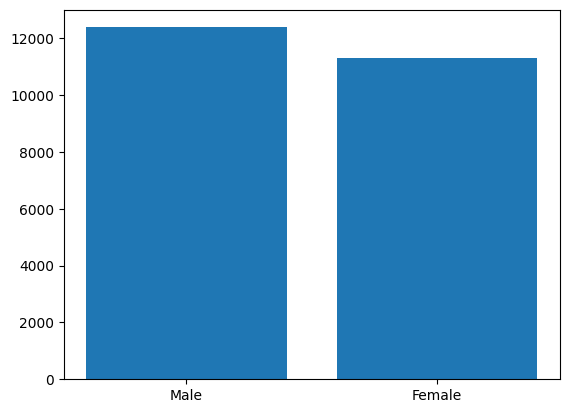

In [12]:
import matplotlib.pyplot as plt

gender = ['Male', 'Female']
values = [12391, 11317]

fig, ax = plt.subplots()
ax.bar(gender, values)

plt.show()


Finding the No. of samples in each age

In [13]:
values, counts = np.unique(ages_f, return_counts=True)
print(counts)


[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


Converting age counts to lists

In [14]:
val= values.tolist()
cnt= counts.tolist()

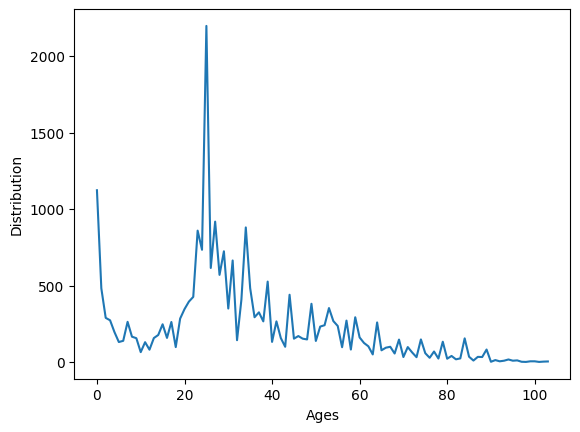

In [15]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()


Defining Lebels for output

In [16]:
len(genders)

23708

In [17]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i = i+1

Creating another list of images from existing one.

 For Better learning

In [18]:
images_f_2 = images_f/255

In [19]:
labels_f = np.array(labels)

Splitting the Dataset into test and train

In [48]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(images_f_2, labels_f, test_size=0.25)


In [54]:
Y_train[0:5]

array([[24,  1],
       [22,  1],
       [32,  0],
       [62,  0],
       [55,  0]])

Splitting 'Y_test' and 'Y_train' Further. 

  for better understanding

In [57]:
Y_train_2 = [Y_train[:,1], Y_train[:,0]]
Y_test_2 = [Y_test[:,1], Y_test[:,0]]

In [58]:
Y_train_2[0][:5]

array([1, 1, 0, 0, 0])

In [59]:
Y_train_2[1][0:5]

array([24, 22, 32, 62, 55])

Defining the Model 

In [83]:
def Convolution(input_tensor,filter):
    x=Conv2D(filters=filters, kernel_size = (3,3), padding = "same", strides = (1,1), kernel_regularizer = l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('rule')(x)
    return x
    
    

In [84]:
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Activation, Flatten, Dense
from keras.regularizers import l2
from keras.models import Model

def Convolution(input_tensor, filters):
    x = Conv2D(filters=filters, kernel_size=(3, 3), padding="same", strides=(1, 1), kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    return x

def model(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 32)
    maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
    conv_2 = Convolution(maxp_1, 64)
    maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
    conv3 = Convolution(maxp_2, 128)
    maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    
    # Add more layers or flatten and add fully connected layers here
    
    flatten = Flatten()(maxp_4)
    dense_1 = Dense(64, activation='relu')(flatten)
    dense_2 = Dense(64, activation='relu')(flatten)

    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)

    output_1= Dense(1, activation='sigmoid', name='sex_out')(drop_1)
    output_2 = Dense(1, activation='relu', name='age_out')(drop_2)

    
    #model = Model(inputs=inputs, outputs=outputs)
    model = Model(inputs=[inputs], outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"], optimizer="Adam", metrics=["accuracy"])
    return model

    if self._variable_creation_fn is None:
        raise ValueError("The function self._variable_creation_fn is None")
    else:
        return self._no_variable_creation_fn(*args, **kwds)

Model = model((48, 48, 3))
Model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d_35 (Conv2D)          (None, 48, 48, 32)           896       ['input_11[0][0]']            
                                                                                                  
 dropout_51 (Dropout)        (None, 48, 48, 32)           0         ['conv2d_35[0][0]']           
                                                                                                  
 activation_32 (Activation)  (None, 48, 48, 32)           0         ['dropout_51[0][0]']          
                                                                                            

In [85]:
from tensorflow.keras.callbacks import ModelCheckpoint

Initializing the Model

In [97]:
fle_s ='Age_Sex_Detection.h5'
checkpoint = ModelCheckpoint(fle_s, monitor='val_loss',verbose=1, save_best_only=True, save_weights_only= False, mode='auto', save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss', restore_best_weights='True')
callback_list=[checkpoint, Early_stop]

In [98]:
History = Model.fit(X_train, Y_train_2, batch_size=64, validation_data=(X_test,Y_test_2), epochs=10, callbacks=callback_list)


Epoch 1/10
278/278 [==============================] - ETA: 0s - loss: 6.5710 - sex_out_loss: 0.2444 - age_out_loss: 5.6233 - sex_out_accuracy: 0.8930 - age_out_accuracy: 0.0463
Epoch 1: val_loss improved from inf to 8.67247, saving model to Age_Sex_Detection.h5


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


278/278 [==============================] - 148s 531ms/step - loss: 6.5710 - sex_out_loss: 0.2444 - age_out_loss: 5.6233 - sex_out_accuracy: 0.8930 - age_out_accuracy: 0.0463 - val_loss: 8.6725 - val_sex_out_loss: 0.2513 - val_age_out_loss: 7.7129 - val_sex_out_accuracy: 0.8865 - val_age_out_accuracy: 0.0506
Epoch 2/10
278/278 [==============================] - ETA: 0s - loss: 6.4513 - sex_out_loss: 0.2383 - age_out_loss: 5.5007 - sex_out_accuracy: 0.8964 - age_out_accuracy: 0.0463
Epoch 2: val_loss did not improve from 8.67247
278/278 [==============================] - 140s 503ms/step - loss: 6.4513 - sex_out_loss: 0.2383 - age_out_loss: 5.5007 - sex_out_accuracy: 0.8964 - age_out_accuracy: 0.0463 - val_loss: 9.6359 - val_sex_out_loss: 0.2586 - val_age_out_loss: 8.6602 - val_sex_out_accuracy: 0.8836 - val_age_out_accuracy: 0.0506
Epoch 3/10
278/278 [==============================] - ETA: 0s - loss: 6.4935 - sex_out_loss: 0.2405 - age_out_loss: 5.5303 - sex_out_accuracy: 0.8974 - age_ou

In [ ]:
Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 8s 41ms/step - loss: 9.5303 - sex_out_loss: 0.2816 - age_out_loss: 8.7682 - sex_out_accuracy: 0.8765 - age_out_accuracy: 0.0506


[9.530279159545898,
 0.28162428736686707,
 8.768196105957031,
 0.8764973878860474,
 0.0506158247590065]

In [99]:
pred=Model.predict(X_test)

186/186 [==============================] - 8s 41ms/step


In [101]:
pred[1]

array([[25.294394 ],
       [ 4.1434636],
       [28.21857  ],
       ...,
       [45.50794  ],
       [37.661686 ],
       [26.64231  ]], dtype=float32)

Plotting Loss

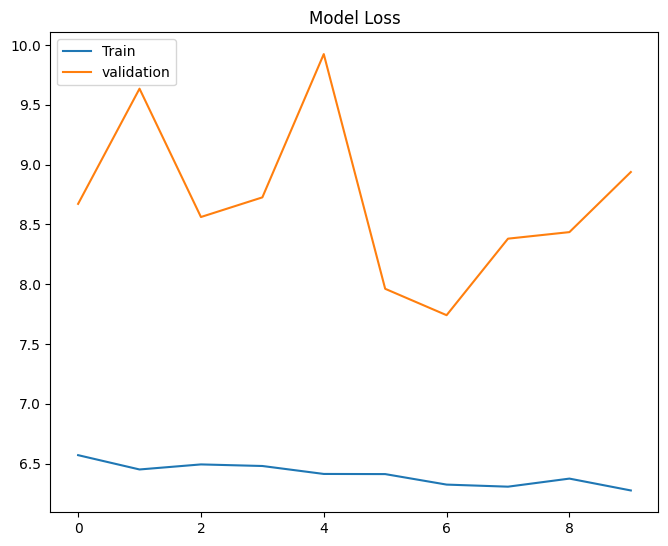

In [106]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train', 'validation'], loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0,hspace=0.25,wspace=0.35)


Plotting sex Accuracy

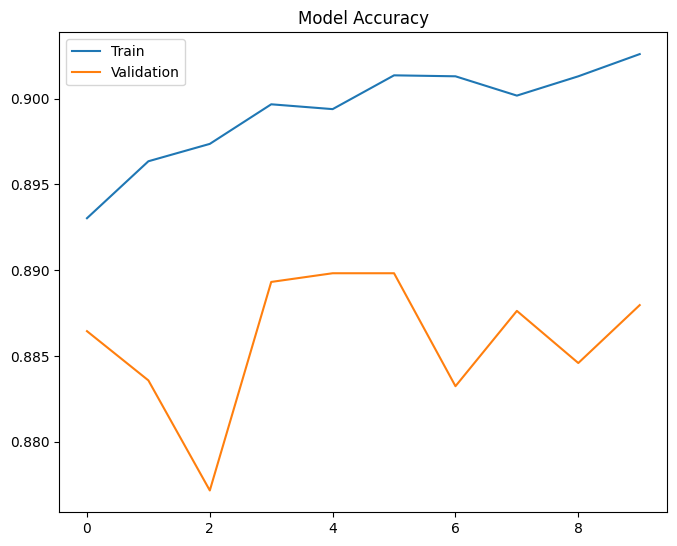

In [107]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train', 'Validation'],loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0,hspace=0.25, wspace=0.35)

Plotting gender accuracy

AttributeError: 'numpy.ndarray' object has no attribute 'main'

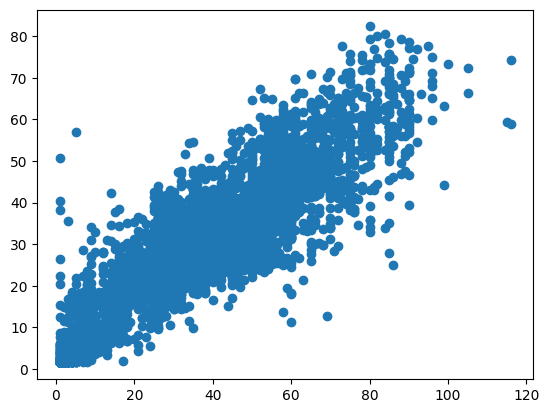

In [111]:
fig,ax = plt.subplots()
ax.scatter(Y_test_2[1], pred[1])
ax.plot([Y_test_2[1].main(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

Making Report of the model (Gender only)

In [112]:
i = 0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1
    

C:\Users\HP\AppData\Local\Temp\ipykernel_15824\4023277462.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_l.append(int(np.round(pred[0][i])))


In [113]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [114]:
report = classification_report(Y_test_2[0], Pred_l)

In [115]:
print(report)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      3073
           1       0.87      0.90      0.89      2854

    accuracy                           0.89      5927
   macro avg       0.89      0.89      0.89      5927
weighted avg       0.89      0.89      0.89      5927



In [117]:
results=confusion_matrix(Y_test_2[0], Pred_l)

Making Heatmap of the model

<Axes: >

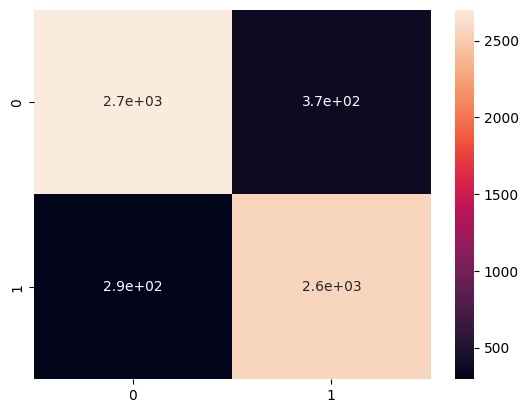

In [118]:
import seaborn as sns
sns.heatmap(results,annot=True)

Testing the images ourself

In [120]:
def test_image(ind, images_f, images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male', 'Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])

Test 1

1/1 [==============================] - 0s 121ms/step
Predicted age is 83
Predicted Gender is Female


C:\Users\HP\AppData\Local\Temp\ipykernel_15824\81484485.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\HP\AppData\Local\Temp\ipykernel_15824\81484485.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


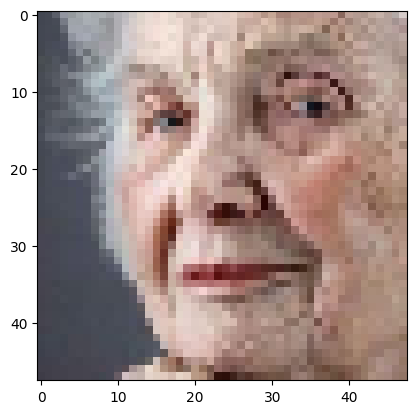

In [122]:
test_image(4, images_f, images_f_2,Model)

Test 2


1/1 [==============================] - 0s 127ms/step
Predicted age is 8
Predicted Gender is Male


C:\Users\HP\AppData\Local\Temp\ipykernel_15824\81484485.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\HP\AppData\Local\Temp\ipykernel_15824\81484485.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


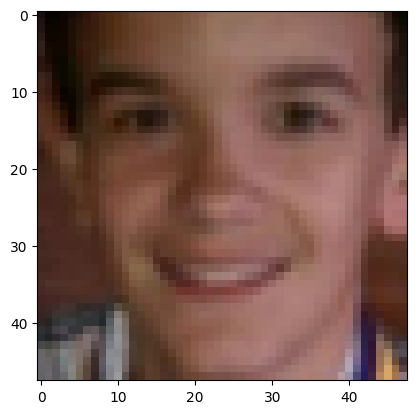

In [123]:
test_image(23, images_f, images_f_2,Model)

Test 3

1/1 [==============================] - 0s 51ms/step
Predicted age is 9
Predicted Gender is Female


C:\Users\HP\AppData\Local\Temp\ipykernel_15824\81484485.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\HP\AppData\Local\Temp\ipykernel_15824\81484485.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


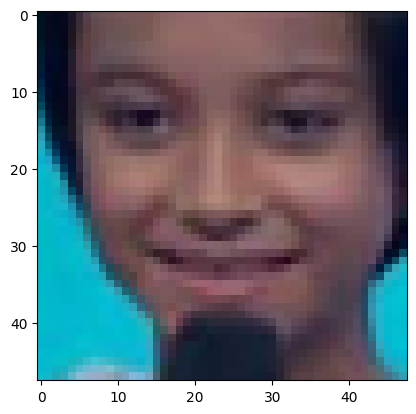

In [124]:
test_image(168, images_f, images_f_2, Model)

Test 4

Error in age case

1/1 [==============================] - 0s 104ms/step
Predicted age is 17
Predicted Gender is Male


C:\Users\HP\AppData\Local\Temp\ipykernel_15824\81484485.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\HP\AppData\Local\Temp\ipykernel_15824\81484485.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


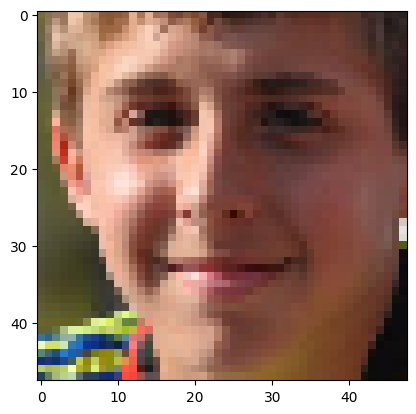

In [125]:
test_image(888, images_f, images_f_2, Model)

Test 5

1/1 [==============================] - 0s 50ms/step
Predicted age is 20
Predicted Gender is Female


C:\Users\HP\AppData\Local\Temp\ipykernel_15824\81484485.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\HP\AppData\Local\Temp\ipykernel_15824\81484485.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


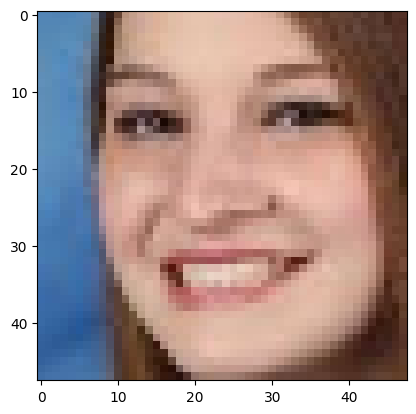

In [126]:
test_image(1288, images_f, images_f_2, Model)